## 1. 데이터 불러오기

In [1]:
import pandas as pd

input_train = "/home/jinwon/workspace/5-plm/nsmc/txt_file/ratings_train.txt"
input_test = "/home/jinwon/workspace/5-plm/nsmc/txt_file/ratings_test.txt"

train = pd.read_csv(input_train, delimiter='\t', header=0)
test = pd.read_csv(input_test, delimiter='\t', header=0)
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


## 2. 중복데이터 확인

In [2]:
train['document'].nunique(), train['label'].nunique() # label 부분은 당연히 긍정,부정이니깐 2개 출력되어야 함.

(146182, 2)

In [3]:
train.drop_duplicates(subset=['document'], inplace=True)

## 3. 결측치 확인

In [4]:
missing_info = train.isnull().sum()
missing_info


id          0
document    1
label       0
dtype: int64

## 4. 결측치 제거

In [5]:
train = train.dropna(subset=['document', 'label'])
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


## 5. index를 label로 매핑

- 나중에 enumerate로 손쉽게 index_to_label함수 작성하기 위해서 미리 처리

In [6]:
train['label'] = train['label'].apply(lambda x: 'positive' if int(x) == 1 else 'negative')
train

/tmp/ipykernel_10342/1215886935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['label'] = train['label'].apply(lambda x: 'positive' if int(x) == 1 else 'negative')


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,negative
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,positive
2,10265843,너무재밓었다그래서보는것을추천한다,negative
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,negative
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,positive
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,negative
149996,8549745,평점이 너무 낮아서...,positive
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,negative
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,positive


In [7]:
train = train[['label', 'document']]
train

,label,document
0,negative,아 더빙.. 진짜 짜증나네요 목소리
1,positive,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,negative,너무재밓었다그래서보는것을추천한다
3,negative,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,positive,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
...,...,...
149995,negative,인간이 문제지.. 소는 뭔죄인가..
149996,positive,평점이 너무 낮아서...
149997,negative,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,positive,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상


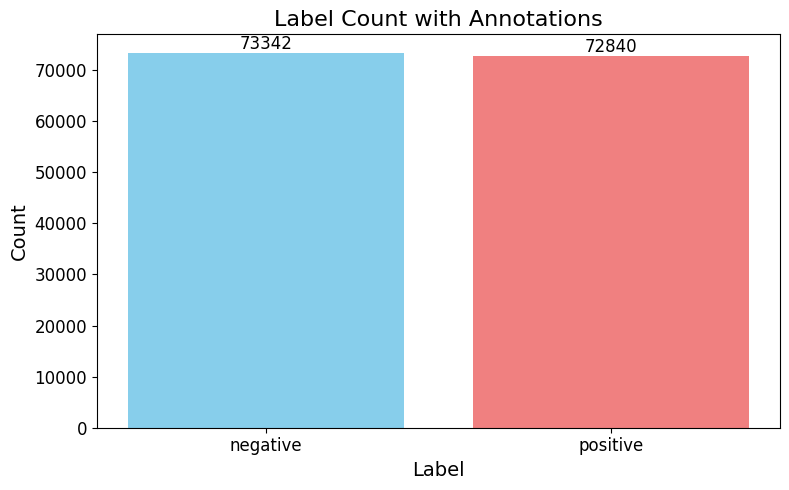

In [8]:
import matplotlib.pyplot as plt

# Step 1: Label 개수 계산
label_counts = train['label'].value_counts()

# Step 2: 막대그래프 그리기
plt.figure(figsize=(8, 5))
bars = plt.bar(label_counts.index, label_counts.values, color=['skyblue', 'lightcoral'])

# Step 3: 막대 위에 주석 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', fontsize=12)

# 그래프 꾸미기
plt.title('Label Count with Annotations', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)  # x축 라벨
plt.yticks(fontsize=12)  # y축 라벨
plt.tight_layout()

# 그래프 보여주기
plt.show()

## 영어만 있는 데이터 개수

In [9]:
import re

# 영어와 특수문자로만 이루어진 데이터를 찾는 함수
def find_english_special_characters_only(df, column_name):
    # 정규식: 영어와 공백, 특수문자만 허용
    pattern = re.compile(r'^[a-zA-Z\s.,?!@#$%^&*()\-_=+\\|{}\[\]:;"\'<>,./?`~]+$')
    
    # 해당 조건에 맞는 데이터 필터링
    filtered = df[df[column_name].apply(lambda x: bool(pattern.fullmatch(x)))]
    
    return len(filtered), filtered

# 'document' 컬럼에서 조건에 맞는 데이터 찾기
count, filtered_data = find_english_special_characters_only(train, 'document')

print(f"조건에 맞는 데이터 개수: {count}")
print("필터링된 데이터:")
print(filtered_data)

조건에 맞는 데이터 개수: 648
필터링된 데이터:
           label                                        document
404     negative                         What is this movie for?
412     positive                      Yesterday when i was young
470     positive                               once upon a dream
668     negative                                         General
1312    negative                                shut the fuck up
...          ...                                             ...
149309  positive  two thumbs up!!!!!! so touching! so impressed!
149358  negative                                             wtf
149364  positive                                          !!!!!!
149630  negative                                      So, what ?
149773  negative                                Real Trash Movie

[648 rows x 2 columns]


## 숫자만 있는 데이터

In [10]:
import re

# 숫자만 이루어진 데이터를 찾는 함수
def find_numbers_only(df, column_name):
    # 정규식: 숫자만 허용
    pattern = re.compile(r'^\d+$')
    
    # 해당 조건에 맞는 데이터 필터링
    filtered = df[df[column_name].apply(lambda x: bool(pattern.fullmatch(x)))]
    
    return len(filtered), filtered

# 'document' 컬럼에서 조건에 맞는 데이터 찾기
count, filtered_data = find_numbers_only(train, 'document')

print(f"숫자로만 이루어진 데이터 개수: {count}")
print("필터링된 데이터:")
print(filtered_data)

숫자로만 이루어진 데이터 개수: 25
필터링된 데이터:
           label          document
584     negative                 1
593     negative                 4
2327    positive        1236547890
12280   positive                10
12414   positive        1234567891
14179   positive        1234567890
20937   negative                55
26701   negative                 0
28844   negative                22
29202   negative    10101010101010
33528   negative                18
39083   positive      123445577900
40204   negative      112233445555
46856   positive                 9
47708   negative  0000000000000000
50468   negative               345
59454   negative        1122334455
68206   positive       12345678910
71596   negative              4444
84201   negative               111
89163   negative               444
95194   negative       14111141516
128246  negative               100
146064  negative            181818
146607  negative                 2


## 전체 훈련데이터에서 토큰개수 평균

/home/jinwon/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Tokenizing documents: 100%|██████████| 146182/146182 [00:05<00:00, 25242.09it/s]


원본 문장:
아 더빙.. 진짜 짜증나네요 목소리

토크나이저로 처리된 토큰 ID:
[2, 5504, 3175, 8638, 2016, 2016, 14188, 22922, 35063, 26796, 3]

토큰 ID에 대응하는 실제 토큰:
['[CLS]', '아', '더', '##빙', '.', '.', '진짜', '짜증', '##나네요', '목소리', '[SEP]']

토큰 최대 길이: 142
평균 토큰 길이: 19.31


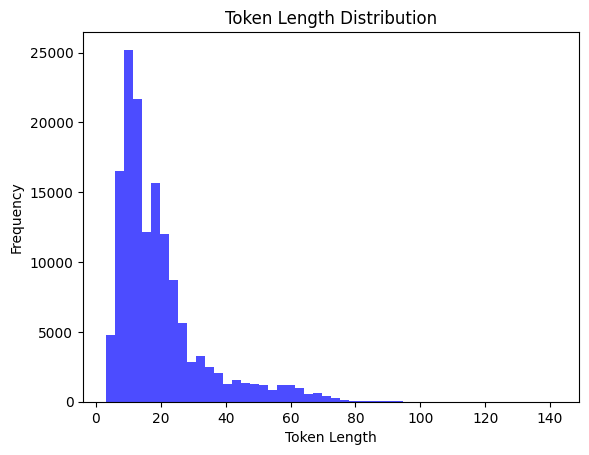

In [11]:
from transformers import BertTokenizerFast
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# BertTokenizerFast 초기화
tokenizer = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")

# 토큰 길이 저장 리스트
token_lengths = []

# 임의로 확인할 문장 (첫 번째 문장)
sample_doc_index = 0  # 임의로 첫 번째 문장을 선택
sample_doc = train["document"][sample_doc_index]

# tqdm을 사용하여 진행 상황 표시
for doc in tqdm(train["document"], desc="Tokenizing documents"):
    encoded = tokenizer.encode(doc, truncation=False, add_special_tokens=True)
    token_lengths.append(len(encoded))

# 샘플 문장 출력 및 토크나이저 결과 확인
sample_encoded = tokenizer.encode(sample_doc, truncation=False, add_special_tokens=True)
decoded_tokens = tokenizer.convert_ids_to_tokens(sample_encoded)

print("원본 문장:")
print(sample_doc)
print("\n토크나이저로 처리된 토큰 ID:")
print(sample_encoded)
print("\n토큰 ID에 대응하는 실제 토큰:")
print(decoded_tokens)

# 통계 계산
max_length = np.max(token_lengths)
mean_length = np.mean(token_lengths)
print(f"\n토큰 최대 길이: {max_length}")
print(f"평균 토큰 길이: {mean_length:.2f}")

# 히스토그램으로 길이 분포 시각화
plt.hist(token_lengths, bins=50, alpha=0.7, color='blue')
plt.title("Token Length Distribution")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.show()

# 구두점이 각 라벨별로 몇개있는지

In [12]:
import pandas as pd
import re

# 구두점 리스트 정의
punctuations = ["!", "\\?", "\\^\\^", "ㅡㅡ", "\\.\\.\\."]

# 라벨별 구두점 개수 계산 함수
def count_punctuation_by_label(df, column, label_column, punctuations):
    # 결과 저장 딕셔너리
    result = {punct: {0: 0, 1: 0} for punct in punctuations}

    # 라벨별 데이터 필터링
    for label in df[label_column].unique():
        filtered_df = df[df[label_column] == label]
        for punct in punctuations:
            # 정규식 패턴으로 구두점 개수 계산
            pattern = re.compile(punct)
            count = filtered_df[column].str.count(pattern).sum()
            result[punct][label] = count
    
    return result

# 데이터 불러오기
input_train = "/home/jinwon/workspace/5-plm/nsmc/txt_file/ratings_train.txt"
train = pd.read_csv(input_train, delimiter='\t', header=0)

# 구두점 개수 세기
result = count_punctuation_by_label(train, 'document', 'label', punctuations)

# 결과 출력
print("구두점 개수 라벨별 집계:")
for punct, counts in result.items():
    print(f"{punct} -> 라벨 0: {counts[0]}, 라벨 1: {counts[1]}")


구두점 개수 라벨별 집계:
! -> 라벨 0: 8361.0, 라벨 1: 23479.0
\? -> 라벨 0: 13190.0, 라벨 1: 5253.0
\^\^ -> 라벨 0: 338.0, 라벨 1: 2501.0
ㅡㅡ -> 라벨 0: 1731.0, 라벨 1: 197.0
\.\.\. -> 라벨 0: 21212.0, 라벨 1: 13028.0


# beomi/kcbert 전처리 참고

In [1]:
from soynlp.normalizer import repeat_normalize

# 테스트 케이스
texts = [
    "ㅋㅋㅋㅋ 진짜 너무 웃겨요",
    "ㅎㅎㅎㅎ 최고야",
    "이건 대박이야ㅠㅠㅠㅠ",
    "와!!! 정말 굉장해!!!!",
    "최고 !!!!!!!"
]

for text in texts:
    normalized = repeat_normalize(text, num_repeats=2)
    print(f"원본: {text} -> 정규화: {normalized}")

원본: ㅋㅋㅋㅋ 진짜 너무 웃겨요 -> 정규화: ㅋㅋ 진짜 너무 웃겨요
원본: ㅎㅎㅎㅎ 최고야 -> 정규화: ㅎㅎ 최고야
원본: 이건 대박이야ㅠㅠㅠㅠ -> 정규화: 이건 대박이야ㅠㅠ
원본: 와!!! 정말 굉장해!!!! -> 정규화: 와!!! 정말 굉장해!!!!
원본: 최고 !!!!!!! -> 정규화: 최고 !!!!!!!


In [6]:
import re
from soynlp.normalizer import repeat_normalize  # soynlp 패키지 사용
import emoji

def clean_text(text, max_length):
    """
    텍스트 데이터를 정제합니다.
    Args:
        text (str): 원본 텍스트.
        max_length (int): 최대 토큰 길이.
    Returns:
        str: 정제된 텍스트.
    """
    # 이모지와 특수문자 필터링 패턴
    emojis = ''.join(emoji.EMOJI_DATA.keys())
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-힣{emojis}]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'
    )

    # 텍스트 정제
    text = repeat_normalize(text, num_repeats=2)  # 반복 문자 정규화 (예: "ㅋㅋㅋㅋ" → "ㅋㅋ")
    text = pattern.sub(' ', text)  # 특수문자 제거
    text = url_pattern.sub('', text)  # URL 제거
    text = text.strip()  # 앞뒤 공백 제거
    
    # 길이 제한 적용
    if len(text.split()) > max_length:
        text = ' '.join(text.split()[:max_length])

    return text

texts = [
    "ㅋㅋㅋ 진짜 너무 웃겨요",
    "ㅎㅎㅎ 최고야",
    "이건 대박이야ㅠㅠㅠ",
    "와!!! 정말 굉장해!!!!",
    "최고 !!!!!!!"
]

max_length = 10
for text in texts:
    cleaned = clean_text(text, max_length)
    print(f"원본: {text} -> 정제된 결과: {cleaned}")

원본: ㅋㅋㅋ 진짜 너무 웃겨요 -> 정제된 결과: ㅋㅋㅋ 진짜 너무 웃겨요
원본: ㅎㅎㅎ 최고야 -> 정제된 결과: ㅎㅎㅎ 최고야
원본: 이건 대박이야ㅠㅠㅠ -> 정제된 결과: 이건 대박이야ㅠㅠㅠ
원본: 와!!! 정말 굉장해!!!! -> 정제된 결과: 와!!! 정말 굉장해!!!!
원본: 최고 !!!!!!! -> 정제된 결과: 최고 !!!!!!!


## repeat_normalize 테스트

In [14]:
from soynlp.normalizer import repeat_normalize, emoticon_normalize

text = "ㅋㅋㅋㅋㅋㅋ 와하하하하하하하핫 진짜 너무 웃겨요 ㅎㅎㅎㅎㅎㅎㅎ"

text = repeat_normalize(text, num_repeats=4)
text

'ㅋㅋㅋㅋ 와하하하하핫 진짜 너무 웃겨요 ㅎㅎㅎㅎ'

In [10]:
text = emoticon_normalize("와하하하핫 진짜 너무 웃겨요 ㅎㅎㅎ", num_repeats=2)
text

'와하하하핫 진짜 너무 웃겨요 ㅎㅎㅎ'

### Github에서 실제 함수코드 불러와서 사용

In [13]:
import re

doublespace_pattern = re.compile('\s+')
repeatchars_pattern = re.compile('(\w)\\1{2,}')

def repeat_normalize(sent, num_repeats=2):
    if num_repeats > 0:
        sent = repeatchars_pattern.sub('\\1' * num_repeats, sent)
    sent = doublespace_pattern.sub(' ', sent)
    return sent.strip()

# 테스트 예제
sentence = "ㅋㅋㅋ 안녕하세요!!! ㅎㅎㅎ ㅠㅠㅠ"
print(repeat_normalize(sentence, num_repeats=2))

ㅋㅋ 안녕하세요!!! ㅎㅎ ㅠㅠ


# Konlpy 라이브러리 형태소분석기들 테스트

## Komoran 형태소 분석기

- Shineware에서 자바로 개발한 한국어 형태소 분석기
- 대규모 한국어 텍스트데이터를 사용해 품사 태깅을 학습.
- 최신 한국어 텍스트에 대한 분석 성능이 뛰어남.
- 다른 형태소 분석기와 다르게 공백이 포함된 형태소 단위로도 분석이 가능해 많이 사용한다.
- [코모란 설명 참고](https://soy3on.tistory.com/171)

In [13]:
%pip install konlpy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from konlpy.tag import Komoran
komoran = Komoran()

text = "왜 아마겟돈 이름을 붙이냐 한국 배급사 이 자슥들"
morphs = komoran.morphs(text)
print(morphs)

['왜', '아마겟돈', '이름', '을', '붙이', '냐', '한국', '배급사', '이', '자슥들']


In [4]:
pos = komoran.pos(text)
print(pos)

[('왜', 'MAG'), ('아마겟돈', 'NNP'), ('이름', 'NNG'), ('을', 'JKO'), ('붙이', 'VV'), ('냐', 'EC'), ('한국', 'NNP'), ('배급사', 'NNP'), ('이', 'MM'), ('자슥들', 'NA')]


In [18]:
text = "1편을 워낙 즐겁게 보았기에 2편에 대한 불안감이 있었다. 혹시 실망하지 않을까.. 하지만 역시 해피피트 ! 이 애니메이션은 10점이란 점수 마저 너무 낮은 것이 아닌가 싶을 정돌로 감동적이다."
result = komoran.pos(text)

print(result)

[('1', 'SN'), ('편', 'NNB'), ('을', 'JKO'), ('워낙', 'MAG'), ('즐겁', 'VA'), ('게', 'EC'), ('보', 'VV'), ('았', 'EP'), ('기', 'ETN'), ('에', 'JKB'), ('2', 'SN'), ('편', 'NNB'), ('에', 'JKB'), ('대하', 'VV'), ('ㄴ', 'ETM'), ('불안감', 'NNG'), ('이', 'JKS'), ('있', 'VX'), ('었', 'EP'), ('다', 'EF'), ('.', 'SF'), ('혹시', 'MAG'), ('실망', 'NNG'), ('하', 'XSV'), ('지', 'EC'), ('않', 'VX'), ('을까', 'EF'), ('.', 'SF'), ('.', 'SF'), ('하지만', 'MAJ'), ('역시', 'MAJ'), ('해피', 'NNP'), ('피트', 'NNP'), ('!', 'SF'), ('이', 'MM'), ('애니메이션', 'NNP'), ('은', 'JX'), ('10', 'SN'), ('점', 'NNB'), ('이란', 'JX'), ('점수', 'NNG'), ('마저', 'MAG'), ('너무', 'MAG'), ('낮', 'VA'), ('은', 'ETM'), ('것', 'NNB'), ('이', 'JKS'), ('아니', 'VCN'), ('ㄴ가', 'EC'), ('싶', 'VX'), ('을', 'ETM'), ('정', 'NNP'), ('돌', 'NNP'), ('로', 'JKB'), ('감동', 'NNG'), ('적', 'XSN'), ('이', 'VCP'), ('다', 'EF'), ('.', 'SF')]


## Okt 형태소분석기

- 트위터 코리아에서 개발
- 대규모 SNS 데이터를 기반으로 설계, 규칙 기반 및 통계기반
- 비공식적인 텍스트(예: 트위터글, 댓글)같은 특정 도메인에 적합
- 대규모 텍스트에서 처리속도가 조금 느려질 수 있음.
- 보통 속도가 더 빠르지만, 정확한 PoS 태깅이 필요한 경우 Kkma와 Komoran을 사용한다고 함.

In [5]:
from konlpy.tag import Okt
okt = Okt()

text = "1편을 워낙 즐겁게 보았기에 2편에 대한 불안감이 있었다. 혹시 실망하지 않을까.. 하지만 역시 해피피트 ! 이 애니메이션은 10점이란 점수 마저 너무 낮은 것이 아닌가 싶을 정돌로 감동적이다."
morphs = okt.morphs(text)
print(morphs)

['1', '편', '을', '워낙', '즐겁게', '보았기에', '2', '편', '에', '대한', '불안감', '이', '있었다', '.', '혹시', '실망하지', '않을까', '..', '하지만', '역시', '해피피트', '!', '이', '애니메이션', '은', '10', '점', '이란', '점수', '마저', '너무', '낮은', '것', '이', '아닌가', '싶을', '정돌', '로', '감동', '적', '이다', '.']


In [6]:
pos = okt.pos(text)
pos2 = okt.pos(text, stem=True)
pos3 = okt.pos(text, norm=True)
pos4 = okt.pos(text, norm=True, stem=True)
print(pos)
print(pos2)
print(pos3)
print(pos4)

[('1', 'Number'), ('편', 'Noun'), ('을', 'Josa'), ('워낙', 'Noun'), ('즐겁게', 'Adjective'), ('보았기에', 'Verb'), ('2', 'Number'), ('편', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('불안감', 'Noun'), ('이', 'Josa'), ('있었다', 'Adjective'), ('.', 'Punctuation'), ('혹시', 'Noun'), ('실망하지', 'Adjective'), ('않을까', 'Verb'), ('..', 'Punctuation'), ('하지만', 'Conjunction'), ('역시', 'Noun'), ('해피피트', 'Noun'), ('!', 'Punctuation'), ('이', 'Noun'), ('애니메이션', 'Noun'), ('은', 'Josa'), ('10', 'Number'), ('점', 'Noun'), ('이란', 'Josa'), ('점수', 'Noun'), ('마저', 'Noun'), ('너무', 'Adverb'), ('낮은', 'Adjective'), ('것', 'Noun'), ('이', 'Josa'), ('아닌가', 'Adjective'), ('싶을', 'Verb'), ('정돌', 'Noun'), ('로', 'Josa'), ('감동', 'Noun'), ('적', 'Suffix'), ('이다', 'Josa'), ('.', 'Punctuation')]
[('1', 'Number'), ('편', 'Noun'), ('을', 'Josa'), ('워낙', 'Noun'), ('즐겁다', 'Adjective'), ('보다', 'Verb'), ('2', 'Number'), ('편', 'Noun'), ('에', 'Josa'), ('대한', 'Noun'), ('불안감', 'Noun'), ('이', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation'), ('혹시', 'Noun'), ('실

## Kkma 형태소분석기

- 서울대학교 IDS 연구실에서 자연어처리를 위해 개발한 한국어 형태소 분석기
- 대규모 한국어 Corpus를 이용해 지도학습기반으로 학습됨.
- 성능이 좋지만, 속도가 느리고 메모리 사용량이 높다.

In [1]:
from konlpy.tag import Kkma
Kkma = Kkma()

text = "자연어 처리 공부는 흥미롭다."
morphs = Kkma.morphs(text)
print(morphs)

['자연어', '처리', '공부', '는', '흥미', '롭', '다', '.']


In [2]:
pos = Kkma.pos(text)
print(pos)

[('자연어', 'NNG'), ('처리', 'NNG'), ('공부', 'NNG'), ('는', 'JX'), ('흥미', 'NNG'), ('롭', 'XSA'), ('다', 'EFN'), ('.', 'SF')]


In [4]:
pos = Kkma.pos("달리기를 하고있었는데, 공부는 하기싫다")
print(pos)

[('달리기', 'NNG'), ('를', 'JKO'), ('하', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('었', 'EPT'), ('는데', 'ECD'), (',', 'SP'), ('공부', 'NNG'), ('는', 'JX'), ('하', 'XSV'), ('기', 'ETN'), ('싫', 'VA'), ('다', 'EFN')]


## Mecab 형태소분석기

- 설치에 오류가 자꾸나서 보류
- 원래 일반 NTT에서 개발된 Mecab을 한국어에 맞게 수정한 버전임.
- 속도가 가장 빠름.
- 딥러닝 기반이 아니라 **규칙기반**으로 설계되어 빠르고 지도학습없이 동작가능하지만, 딥러닝 기반보다 성능이 낮을 수 있음.

In [15]:
# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [16]:
# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [17]:
# %%bash
# bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
# pip3 install /tmp/mecab-python-0.996

In [18]:
# from konlpy.tag import Mecab
# mecab = Mecab()

# text = "자연어 처리 공부는 흥미롭다."
# morphs = mecab.morphs(text)
# print(morphs)

In [19]:
# pos = mecab.pos(text)
# print(pos)

# 바른 형태소분석기 테스트

In [5]:
import sys
import google.protobuf.text_format as tf
from bareunpy import Tagger

API_KEY = API_KEY # 발급받은 api key를 작성

# If you have your own localhost bareun.
my_tagger = Tagger(API_KEY, 'localhost', 5757)

res = my_tagger.tags(["안녕하세요.", "반가워요!"])
m = res.msg()
tf.PrintMessage(m, out=sys.stdout, as_utf8=True)
print(tf.MessageToString(m, as_utf8=True))
print(f'length of sentences is {len(m.sentences)}')

print(f'length of tokens in sentences[0] is {len(m.sentences[0].tokens)}')
print(f'length of morphemes of first token in sentences[0] is {len(m.sentences[0].tokens[0].morphemes)}')
print(f'lemma of first token in sentences[0] is {m.sentences[0].tokens[0].lemma}')
print(f'first morph of first token in sentences[0] is {m.sentences[0].tokens[0].morphemes[0]}')
print(f'tag of first morph of first token in sentences[0] is {m.sentences[0].tokens[0].morphemes[0].tag}')

sentences {
  text {
    content: "안녕하세요."
    length: 6
  }
  tokens {
    text {
      content: "안녕하세요."
      length: 6
    }
    morphemes {
      text {
        content: "안녕하"
        length: 3
      }
      tag: VA
      out_of_vocab: IN_BUILTIN_DICT
    }
    morphemes {
      text {
        content: "시"
        begin_offset: 3
        length: 1
      }
      tag: EP
      probability: 0.9999606
    }
    morphemes {
      text {
        content: "어요"
        begin_offset: 3
        length: 2
      }
      tag: EF
      probability: 0.9929438
    }
    morphemes {
      text {
        content: "."
        begin_offset: 5
        length: 1
      }
      tag: SF
      probability: 0.9998064
    }
    lemma: "안녕하"
    tagged: "안녕하/VA+시/EP+어요/EF+./SF"
  }
  refined: "안녕하세요."
}
sentences {
  text {
    content: "반가워요!"
    begin_offset: 7
    length: 5
  }
  tokens {
    text {
      content: "반가워요!"
      begin_offset: 7
      length: 5
    }
    morphemes {
      text {
        con

In [7]:
# 필요한 라이브러리 임포트
import re
from soynlp.normalizer import repeat_normalize
from bareunpy import Tagger
import emoji

# Bareun API 초기화
API_KEY = API_KEY # 발급받은 api key를 작성
bareun_tagger = Tagger(API_KEY, "localhost", 5757)

# 제거할 품사 태그 정의
REMOVE_POS = {
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC',  # 조사, 접속사
    'SF', 'SP', 'SS', 'SE', 'SO',  # 구두점
}

def clean_text_with_bareun(text):
    """
    Bareun 형태소 분석기를 사용하여 텍스트를 정제합니다.
    Args:
        text (str): 원본 텍스트.
    Returns:
        str: 정제된 텍스트.
    """
    if not text.strip():
        return ''
    
    # 공백을 "A"로 대체
    text = text.replace(' ', 'A')
    
    # Bareun 형태소 분석 호출
    res = bareun_tagger.tags([text])  # Bareun은 리스트 형태로 입력받음
    processed_tokens = []

    for sentence in res.msg().sentences:
        for token in sentence.tokens:
            for morph in token.morphemes:
                # REMOVE_POS에 포함된 태그를 가진 형태소 제거
                print(f"morph = {morph}")
                if morph.tag not in REMOVE_POS:
                    print(f"morph.tag = {morph.tag}")
                    processed_tokens.append(morph.text.content)
    
    # 형태소 분석 결과를 공백으로 결합
    processed_text = ' '.join(processed_tokens)

    # "A"를 다시 빈칸으로 복원
    processed_text = processed_text.replace('A', ' ')
    
    # 다중 공백 제거
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()
    
    return processed_text




# 테스트 코드
def run_test():
    test_text = "나는 행복하다. 하지만 오늘은 기분이 너무 좋다!"
    print(f"Input Text: {test_text}")
    
    expected_output = "나 행복 하다 오늘 기분 너무 좋다"
    print(f"Expected Output: {expected_output}")
    
    actual_output = clean_text_with_bareun(test_text)
    print(f"Actual Output: {actual_output}")
    
    if actual_output == expected_output:
        print("✅ Test Passed: REMOVE_POS 태그가 잘 제거되었습니다.")
    else:
        print("❌ Test Failed: 예상 결과와 일치하지 않습니다.")

# 실행
run_test()


# morph.tag가 숫자로 반환되는 문제가 원인이였음.

Input Text: 나는 행복하다. 하지만 오늘은 기분이 너무 좋다!
Expected Output: 나 행복 하다 오늘 기분 너무 좋다
morph = text {
  content: "\353\202\230"
  length: 1
}
tag: NP
probability: 0.9648109078407288

morph.tag = 26
morph = text {
  content: "\353\212\224"
  begin_offset: 1
  length: 1
}
tag: JX
probability: 0.9976519346237183

morph.tag = 15
morph = text {
  content: "A"
  begin_offset: 2
  length: 1
}
tag: SL
probability: 0.9573767185211182

morph.tag = 32
morph = text {
  content: "\355\226\211\353\263\265"
  begin_offset: 3
  length: 2
}
tag: NNG
probability: 0.9680190682411194

morph.tag = 24
morph = text {
  content: "\355\225\230"
  begin_offset: 5
  length: 1
}
tag: XSA
probability: 0.9908753633499146

morph.tag = 45
morph = text {
  content: "\353\213\244"
  begin_offset: 6
  length: 1
}
tag: EF
probability: 0.9884401559829712

morph.tag = 2
morph = text {
  content: "."
  begin_offset: 7
  length: 1
}
tag: SF
probability: 0.9957044720649719

morph.tag = 30
morph = text {
  content: "A"
  begin_offset: 8

# MarianMTModel 테스트

In [1]:
from transformers import MarianMTModel, MarianTokenizer
import pandas as pd
import argparse
import re
from soynlp.normalizer import repeat_normalize
import emoji
import random
from dotenv import load_dotenv
import os

model_name_src_to_tgt = "Helsinki-NLP/opus-mt-ko-en"
model_name_tgt_to_src = "Helsinki-NLP/opus-mt-tc-big-en-ko"

# 토큰 매개변수를 제거합니다.
tokenizer_src_to_tgt = MarianTokenizer.from_pretrained(model_name_src_to_tgt)
model_src_to_tgt = MarianMTModel.from_pretrained(model_name_src_to_tgt)

tokenizer_tgt_to_src = MarianTokenizer.from_pretrained(model_name_tgt_to_src)
model_tgt_to_src = MarianMTModel.from_pretrained(model_name_tgt_to_src)

/home/jinwon/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
text = "재밌었다.진저 너무 무서버~ㅠ"

encoded = tokenizer_src_to_tgt.encode(text, return_tensors="pt")
translated = model_src_to_tgt.generate(encoded, max_new_tokens=100)
english_text = tokenizer_src_to_tgt.decode(translated[0], skip_special_tokens=True)
print(f"Original: {text} | Translated (EN): {english_text}")

Original: 재밌었다.진저 너무 무서버~ㅠ | Translated (EN): It was fun. It was so scary.


In [5]:
encoded = tokenizer_tgt_to_src.encode(english_text, return_tensors="pt")
translated = model_tgt_to_src.generate(encoded, max_new_tokens=100)
back_translated_text = tokenizer_tgt_to_src.decode(translated[0], skip_special_tokens=True)
print(f"Back Translated (KO): {back_translated_text}")

# 잘 안됨. 이상함.

Back Translated (KO): wavether convergence. 웨이브더 컨버전스.


## 랜덤문자위치변경

In [14]:
import random

def shuffle_korean_word(word):
    """
    단어 내부의 문자 위치를 랜덤하게 섞습니다.
    단, 단어의 길이가 3 이하이면 섞지 않습니다.
    """
    if len(word) <= 3:  # 길이가 3 이하인 단어는 변경하지 않음
        return word

    # 첫 글자와 마지막 글자는 고정, 중간 글자만 섞음
    middle_chars = list(word[1:-1])
    random.shuffle(middle_chars)
    return word[0] + ''.join(middle_chars) + word[-1]

def augment_text(text):
    """
    문장의 각 단어에 대해 랜덤 셔플을 적용합니다.
    """
    words = text.split()
    augmented_words = [shuffle_korean_word(word) for word in words]
    return " ".join(augmented_words)

# 테스트 데이터
text = "포메라니안 강아지랑 놀다보니깐 식탁에 음식이 가득 차 있었다."

# 증강된 결과 확인
augmented_text = augment_text(text)
print("원본 문장:", text)
print("증강된 문장:", augmented_text)


원본 문장: 포메라니안 강아지랑 놀다보니깐 식탁에 음식이 가득 차 있었다.
증강된 문장: 포라니메안 강아지랑 놀보다니깐 식탁에 음식이 가득 차 있었다.
